### Importing Libraries

In [1]:
import sys
import os
import pycountry
import re
import string
import tweepy

import pandas as pd
import numpy as np

import googletrans
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA  
from nltk.stem import SnowballStemmer as stem
from nltk.stem import PorterStemmer as pstem
from langdetect import detect
from googletrans import Translator
from sklearn.feature_extraction.text import CountVectorizer as CV

from textblob import TextBlob as TB
from wordcloud import WordCloud, STOPWORDS

import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

### Twitter Authentication Keys

In [2]:
def read_apikey():
    with open("apikey.txt", "r") as f:
        lines = f.readlines()
        return lines[0].strip()

def read_apisecret():
    with open("apisecret.txt", "r") as f:
        lines = f.readlines()
        return lines[0].strip()

def read_accesstoken():
    with open("accesstoken.txt", "r") as f:
        lines = f.readlines()
        return lines[0].strip()

def read_accesstokensecret():
    with open("accesstokensecret.txt", "r") as f:
        lines = f.readlines()
        return lines[0].strip()

#APIKey = "ZJkiTJvFKH0T7bg2jACaBBksy"
#APISecret = "6Rt7pjQZpsQHd6QHAjyBYier9GafTYqlc9SwhzQPKJD2LR4cGe"
#AccessToken = "1415772788-7sjLgJPNTTUaOZlc3SmDHnw8Tf5bEazJHjcnMfN"
#AccessTokenSecret = "QmTlscq9EnNEcOjlHheS4S9VrXtOzvM0mioFhKZUhIxy4"

APIKey = read_apikey()
APISecret = read_apisecret()
AccessToken = read_accesstoken()
AccessTokenSecret = read_accesstokensecret()

auth = tweepy.OAuthHandler(APIKey, APISecret)
auth.set_access_token(AccessToken, AccessTokenSecret)
api = tweepy.API(auth)

print("Keys & Tokens inherited successfully")

Keys & Tokens inherited successfully


### Functions to be Called

In [3]:
def percentage(part, whole):
    return 100 * float(part) / float(whole)

def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text 

def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def count_values_in_column(data, feature):
    total = data.loc[:, feature].value_counts(dropna = False)
    percentage = round(data.loc[:, feature].value_counts(dropna = False, normalize = True) * 100, 2)
    return pd.concat([total,percentage],axis=1,keys=['Total', 'Percentage'])

def remove_excess(text):
    text = re.sub('RT.*? ', '', text)
    text = re.sub('@.*? ', '', text)
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

def remove_tags(text):
    text = "".join([])

translator = Translator(service_urls=['translate.googleapis.com'])
def translate(text):
    translation = translator.translate(text, dest='en')
    return translation

def tokenization(text):
    text = re.split('\W+', text)
    return text

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

ps = pstem()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation])
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

def get_top_n_gram(corpus, ngram_range, n=None):
    vec = CV(ngram_range = ngram_range, stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

### Input Target Key Words for Twitter Search

In [4]:
keyword = input("Please enter the keyword / statement you are searching for : ")
noOfTweet = int(input("Please enter the number of Tweets you want to analyze : "))

tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)

Please enter the keyword / statement you are searching for : vox
Please enter the number of Tweets you want to analyze : 500


### Segregating into Positive, Negative and Neutral Tweets

In [5]:
positive = 0
negative = 0
neutral = 0
polarity = 0

tweet_list = []
positive_list = []
negative_list = []
neutral_list = []

for tweet in tweets:
    tweet_list.append(tweet.text)
    analysis = TB(tweet.text)
    score = SIA().polarity_scores(tweet.text)
    pos = score['pos']
    neg = score['neg']
    neu = score['neu']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)

positive = format(positive, ".2f")
negative = format(negative, ".2f")
neutral = format(neutral, ".2f")

print("\nPositive Tweet Percentage : ", positive)
print("Negative Tweet Percentage : ", negative)
print("Neutral Tweet Percentage : ", neutral)
print("\nPolarity Percentage : ", polarity)


Positive Tweet Percentage :  13.00
Negative Tweet Percentage :  15.60
Neutral Tweet Percentage :  71.40

Polarity Percentage :  0.5104823232323235


### Creating a DataFrame Containing Sentiment Stats

In [6]:
tweet_data = pd.DataFrame(tweet_list)
positive_data = pd.DataFrame(positive_list)
negative_data = pd.DataFrame(negative_list)
neutral_data = pd.DataFrame(neutral_list)

stat_vals = ["Total Tweets", "Positive Tweets", "Negative Tweets", "Neutral Tweets"]
stat_cts = [len(tweet_list), len(positive_list), len(negative_list), len(neutral_list)]
stats = pd.DataFrame(list(zip(stat_vals, stat_cts)), columns=["Number of", "Count"])

In [7]:
stats_pie = stats.drop(0, axis=0)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "bar"}]])

fig.add_trace(go.Pie(labels=stats_pie["Number of"], values=stats_pie["Count"], 
                     hovertemplate = "Tweet Distribution: <br>%{label} </br>Percentage: %{percent} </br><extra></extra>",
                     marker = dict(line = dict(color='#000000', width=0.5)), pull=[0.05, 0.05, 0.05]), 1, 1)

fig.add_trace(go.Bar(x=stats_pie["Number of"], y=stats_pie["Count"], 
                     hovertemplate = "Tweet Distribution: <br>%{x} </br>Percentage: %{y} </br><extra></extra>",
                     marker_color='goldenrod'), 1, 2)

fig.update(layout_title_text='Tweet Distribution', layout_showlegend=False)
fig.update_layout(hoverlabel=dict(bgcolor="white", font_size=16, font_family="Rockwell"), hovermode='x', plot_bgcolor='white')
fig = go.Figure(fig)
fig.show()

In [8]:
tweet_data.sample(10)

0
131  @TeoGarciaEgea Gracias @vox_es vosotros si soi...
334  @AsdeTrebolesB Entonces todas las leyes aplica...
90   @Mas_Rozas @Ayto_Las_Rozas @jdelauz Pero si @V...
472  Hay que compartirlo #Cuba #CubaEsUnaDictadura ...
86   RT @ArturoVilla_: 🔴 El Gobierno secuestró a lo...
6    ‼️ #ÚLTIMAHORA \n\nEl Tribunal Constitucional ...
359  RT @DiegoZapata_01: Predomina el criterio cons...
381  RT @joseramirezdel2: Gracias a @_Marta_Castro ...
32   RT @edugalan: "El Constitucional tumba el conf...
63   RT @Roberhik89: Pues el más alto tribunal ha d...

### Data Cleaning to Better Improve Stats

In [9]:
tweet_data.drop_duplicates(inplace=True)

tweet_data["text"] = tweet_data[0]

remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)

tweet_data['text'] = tweet_data['text'].apply(lambda x : remove_url(x))
tweet_data['text'] = tweet_data['text'].apply(lambda x : remove_excess(x))
tweet_data['text'] = tweet_data['text'].apply(lambda x : remove_emoji(x))
tweet_data['text'] = tweet_data['text'].apply(lambda x : decontraction(x))
tweet_data['text'] = tweet_data['text'].apply(lambda x : seperate_alphanumeric(x))
tweet_data['text'] = tweet_data['text'].apply(lambda x : unique_char(cont_rep_char,x))
tweet_data["text"] = tweet_data.text.map(remove_rt).map(rt)
tweet_data["text"] = tweet_data.text.str.lower()
#tweet_data['text'] = tweet_data['text'].apply(lambda x : translate(x))

tweet_data.sample(10)

0  \
83   RT @SergiMaranya: ÚLTIMA HORA 14.37 h: El Trib...   
13   RT @Proserpinasb: A pesar de mis discrepancias...   
498  @Alejpicon Llorón, no vengas con demagogia, el...   
215  RT @FcoCP96: Podrá gustar o no, pero gracias a...   
368  El recurso presentado por VOX ! siempre atento...   
488       前回もだし今回もDodaさんにUberEATSしてもらった……🍖ありがとうございます😭🙏   
139  RT @bulldog_punk: Esto es lo que no quieren in...   
338  El recurso es de Vox, admitid que sois la dere...   
54   RT @eledhmel: Agreden a una mujer con piedras,...   
131  @TeoGarciaEgea Gracias @vox_es vosotros si soi...   

                                                  text  
83    ltima hora h el tribunal constitucional d na ...  
13   a pesar de mis discrepancias en muchos temas e...  
498  llor n no vengas con demagogia el  nico partid...  
215  podr  gustar o no pero gracias a los recursos ...  
368  el recurso presentado por vox siempre atento a...  
488                                       dodaubereats  
139      esto es lo que no quieren investigar vox y pp  
338  el recurso es de vox admitid que sois la derec...  
54   agreden a una mujer con piedras pero es de vox...  
131  gracias vosotros si sois el voto  til a seguir...

### Segregating Cleaned Data into Sentiments

In [10]:
tweet_data[['polarity', 'subjectivity']] = tweet_data['text'].apply(lambda Text: pd.Series(TB(Text).sentiment))

clean_positive = 0
clean_negative = 0
clean_neutral = 0
clean_polarity = 0

for index, row in tweet_data['text'].iteritems():
    score = SIA().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tweet_data.loc[index, 'sentiment'] = "Negative"
        clean_negative += 1
 
    elif pos > neg:
        tweet_data.loc[index, 'sentiment'] = "Positive"
        clean_positive += 1
    
    elif pos == neg:
        tweet_data.loc[index, 'sentiment'] = "Neutral"
        clean_neutral += 1
 
    tweet_data.loc[index, 'pos'] = pos
    tweet_data.loc[index, 'neg'] = neg
    tweet_data.loc[index, 'neu'] = neu
    tweet_data.loc[index, 'compound'] = comp

tweet_data.columns = ['Tweets', 'Raw Text', 'Polarity', 'Subjectivity', 'Sentiment', 'Positive', 'Negative', 'Neutral', 'Compound']

clean_positive_data = tweet_data[tweet_data["Sentiment"] == "Positive"]
clean_negative_data = tweet_data[tweet_data["Sentiment"] == "Negative"]
clean_neutral_data = tweet_data[tweet_data["Sentiment"] == "Neutral"]

clean_positive = percentage(clean_positive, tweet_data.shape[0])
clean_negative = percentage(clean_negative, tweet_data.shape[0])
clean_neutral = percentage(clean_neutral, tweet_data.shape[0])
clean_polarity = percentage(clean_polarity, tweet_data.shape[0])

clean_positive = format(clean_positive, ".2f")
clean_negative = format(clean_negative, ".2f")
clean_neutral = format(clean_neutral, ".2f")

print("\nPositive Tweet Percentage : ", clean_positive)
print("Negative Tweet Percentage : ", clean_negative)
print("Neutral Tweet Percentage : ", clean_neutral)

tweet_data.sample(10)


Positive Tweet Percentage :  13.95
Negative Tweet Percentage :  21.71
Neutral Tweet Percentage :  64.34


Tweets  \
50   RT @cristinapelaez: Hoy miércoles VOX volverá ...   
87   @monasterioR,@pablocasado_,@POTUS,@MaElviraSal...   
51   @iescolar Escolar... Di la verdad, El Gobierno...   
104  Los medios propagandísticos del Gobierno Sanch...   
21   @Santi_ABASCAL @vox_es  👉"La mayor vulneración...   
462  Solo VOX votó en contra del estado de alarma.\...   
334  @AsdeTrebolesB Entonces todas las leyes aplica...   
487  RT @realTuckFrumper: One Good Thing: An incred...   
197  @Disidencia_LIB La foto respecto a lo de Vox. ...   
3    RT @gerardotc: Hola, @vox_es. Un RT a esto, po...   

                                              Raw Text  Polarity  \
50   hoy mi rcoles vox volver  a ser la voz y el ar...     0.000   
87   monasteriorpablocasadopotusmaelvirasalazarvoxe...     0.000   
51   escolar di la verdad el gobierno de s nchez se...     0.000   
104  los medios propagand sticos del gobierno sanch...     0.000   
21   la mayor vulneraci n de derechos de la histori...     0.000   
462  solo vox vot  en contra del estado de alarma e...     0.000   
334  entonces todas las leyes aplicadas est n sin e...     0.000   
487  one good thing an incredible true crime book a...     0.575   
197  la foto respecto a lo de vox respecto al pp en...     0.000   
3                                 hola un a esto porfa     0.000   

     Subjectivity Sentiment  Positive  Negative  Neutral  Compound  
50            0.0   Neutral     0.000     0.000    1.000    0.0000  
87            0.0   Neutral     0.000     0.000    1.000    0.0000  
51            0.0   Neutral     0.000     0.000    1.000    0.0000  
104           0.0   Neutral     0.000     0.000    1.000    0.0000  
21            0.0   Neutral     0.000     0.000    1.000    0.0000  
462           0.0  Positive     0.119     0.000    0.881    0.4019  
334           0.0  Negative     0.000     0.247    0.753   -0.5574  
487           0.7  Negative     0.312     0.357    0.331   -0.2960  
197           0.0   Neutral     0.000     0.000    1.000    0.0000  
3             0.0   Neutral     0.000     0.000    1.000    0.0000

In [11]:
stat_vals_clean = ["Total Tweets", "Positive Tweets", "Negative Tweets", "Neutral Tweets"]
stat_cts_clean = [tweet_data.shape[0], clean_positive_data.shape[0], clean_negative_data.shape[0], clean_neutral_data.shape[0]]
stats_clean = pd.DataFrame(list(zip(stat_vals_clean, stat_cts_clean)), columns=["Number of", "Count"])

stats_pie_clean = stats_clean.drop(0, axis=0)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "bar"}]])

colors = ["black", "lightgrey"]

fig.add_trace(go.Pie(labels=stats_pie_clean["Number of"], values=stats_pie_clean["Count"], 
                     hovertemplate = "Tweet Distribution: <br>%{label} </br>Percentage: %{percent} </br><extra></extra>",
                     marker = dict(line = dict(color='#000000', width=0.5)), pull=[0.05, 0.05, 0.05]), 1, 1)

fig.add_trace(go.Bar(x=stats_pie_clean["Number of"], y=stats_pie_clean["Count"], 
                     hovertemplate = "Tweet Distribution: <br>%{x} </br>Number of Tweets: %{y} </br><extra></extra>",
                     marker_color='yellowgreen'), 1, 2)

fig.update(layout_title_text='Tweet Distribution', layout_showlegend=False)
fig.update_layout(hoverlabel=dict(bgcolor="white", font_size=16, font_family="Rockwell"), hovermode='x', plot_bgcolor='white')
fig = go.Figure(fig)
fig.show()

### Stripping, Tokenizing and Stemming Words to their Root Form

In [12]:
count_values_in_column(tweet_data, "Sentiment")

tweet_data["Length"] = tweet_data["Raw Text"].astype(str).apply(len) 
tweet_data["Word Count"] = tweet_data["Raw Text"].apply(lambda x: len(str(x).split()))

round(pd.DataFrame(tweet_data.groupby("Sentiment").Length.mean()), 2)

tweet_data['Non-Punctuated'] = tweet_data['Raw Text'].apply(lambda x: remove_punct(x))
tweet_data['Tokenized'] = tweet_data['Non-Punctuated'].apply(lambda x: tokenization(x.lower()))

stopword = nltk.corpus.stopwords.words('english')
tweet_data['No-Stopwords'] = tweet_data['Tokenized'].apply(lambda x: remove_stopwords(x))
tweet_data['Stemmed'] = tweet_data['No-Stopwords'].apply(lambda x: stemming(x))

tweet_data.sample(10)

Tweets  \
42   RT @CasoAislado_Es: 🔴 Gracias a un recurso pre...   
155  El bueno de Teo adjudicándose el triunfo de @v...   
268  @Carlosssbusss Todo bien atado,  la justicia  ...   
272  RT @iescolar: ÚLTIMA HORA | El Tribunal Consti...   
64   RT @StrangeLetrado: Solo VOX puso palos en las...   
358  @TeoGarciaEgea Gracias a VOX, eres un sinvergü...   
163  @LagrimasProgres @vox_es SIIIIIIIIIIIIIIIIIIII...   
233  @TeoGarciaEgea Vosotros votasteis a favor del ...   
457  @Adrilastra ya LO DE ESTA JUSTICIA DERECHIZADA...   
96            @bea_fanjul Gracias a VOX. #SOLOQUEDAVOX   

                                              Raw Text  Polarity  \
42   gracias a un recurso presentado por vox el tri...       0.0   
155  el bueno de teo adjudic ndose el triunfo de cu...       0.0   
268  todo bien atado la justicia comprada por el pp...       0.0   
272   ltima hora el tribunal constitucional tumba e...       0.0   
64   solo vox puso palos en las ruedas a toda medid...       0.0   
358  gracias a vox eres un sinverg enza que votaste...       0.0   
163                                                sii       0.0   
233  vosotros votasteis a favor del estado de alarm...       0.0   
457  ya lo de esta justicia derechizada jueces ppep...       0.0   
96                          gracias a vox soloquedavox       0.0   

     Subjectivity Sentiment  Positive  Negative  Neutral  Compound  Length  \
42            0.0  Positive     0.124     0.000    0.876    0.3400     116   
155           0.0  Positive     0.137     0.000    0.863    0.4019      96   
268           0.0   Neutral     0.000     0.000    1.000    0.0000      95   
272           0.0   Neutral     0.000     0.000    1.000    0.0000      82   
64            0.0   Neutral     0.000     0.000    1.000    0.0000      96   
358           0.0   Neutral     0.000     0.000    1.000    0.0000      80   
163           0.0   Neutral     0.000     0.000    1.000    0.0000       3   
233           0.0  Positive     0.144     0.000    0.856    0.4019      99   
457           0.0  Negative     0.000     0.194    0.806   -0.5574     102   
96            0.0   Neutral     0.000     0.000    1.000    0.0000      26   

     Word Count                                     Non-Punctuated  \
42           19  gracias a un recurso presentado por vox el tri...   
155          19  el bueno de teo adjudic ndose el triunfo de cu...   
268          15  todo bien atado la justicia comprada por el pp...   
272          15   ltima hora el tribunal constitucional tumba e...   
64           20  solo vox puso palos en las ruedas a toda medid...   
358          17  gracias a vox eres un sinverg enza que votaste...   
163           1                                                sii   
233          23  vosotros votasteis a favor del estado de alarm...   
457          17  ya lo de esta justicia derechizada jueces ppep...   
96            4                         gracias a vox soloquedavox   

                                             Tokenized  \
42   [gracias, a, un, recurso, presentado, por, vox...   
155  [el, bueno, de, teo, adjudic, ndose, el, triun...   
268  [todo, bien, atado, la, justicia, comprada, po...   
272  [, ltima, hora, el, tribunal, constitucional, ...   
64   [solo, vox, puso, palos, en, las, ruedas, a, t...   
358  [gracias, a, vox, eres, un, sinverg, enza, que...   
163                                              [sii]   
233  [vosotros, votasteis, a, favor, del, estado, d...   
457  [ya, lo, de, esta, justicia, derechizada, juec...   
96                     [gracias, a, vox, soloquedavox]   

                                          No-Stopwords  \
42   [gracias, un, recurso, presentado, por, vox, e...   
155  [el, bueno, de, teo, adjudic, ndose, el, triun...   
268  [todo, bien, atado, la, justicia, comprada, po...   
272  [, ltima, hora, el, tribunal, constitucional, ...   
64   [solo, vox, puso, palos, en, las, ruedas, toda...   
358  [gracias, vox, eres, un, sinverg, enza

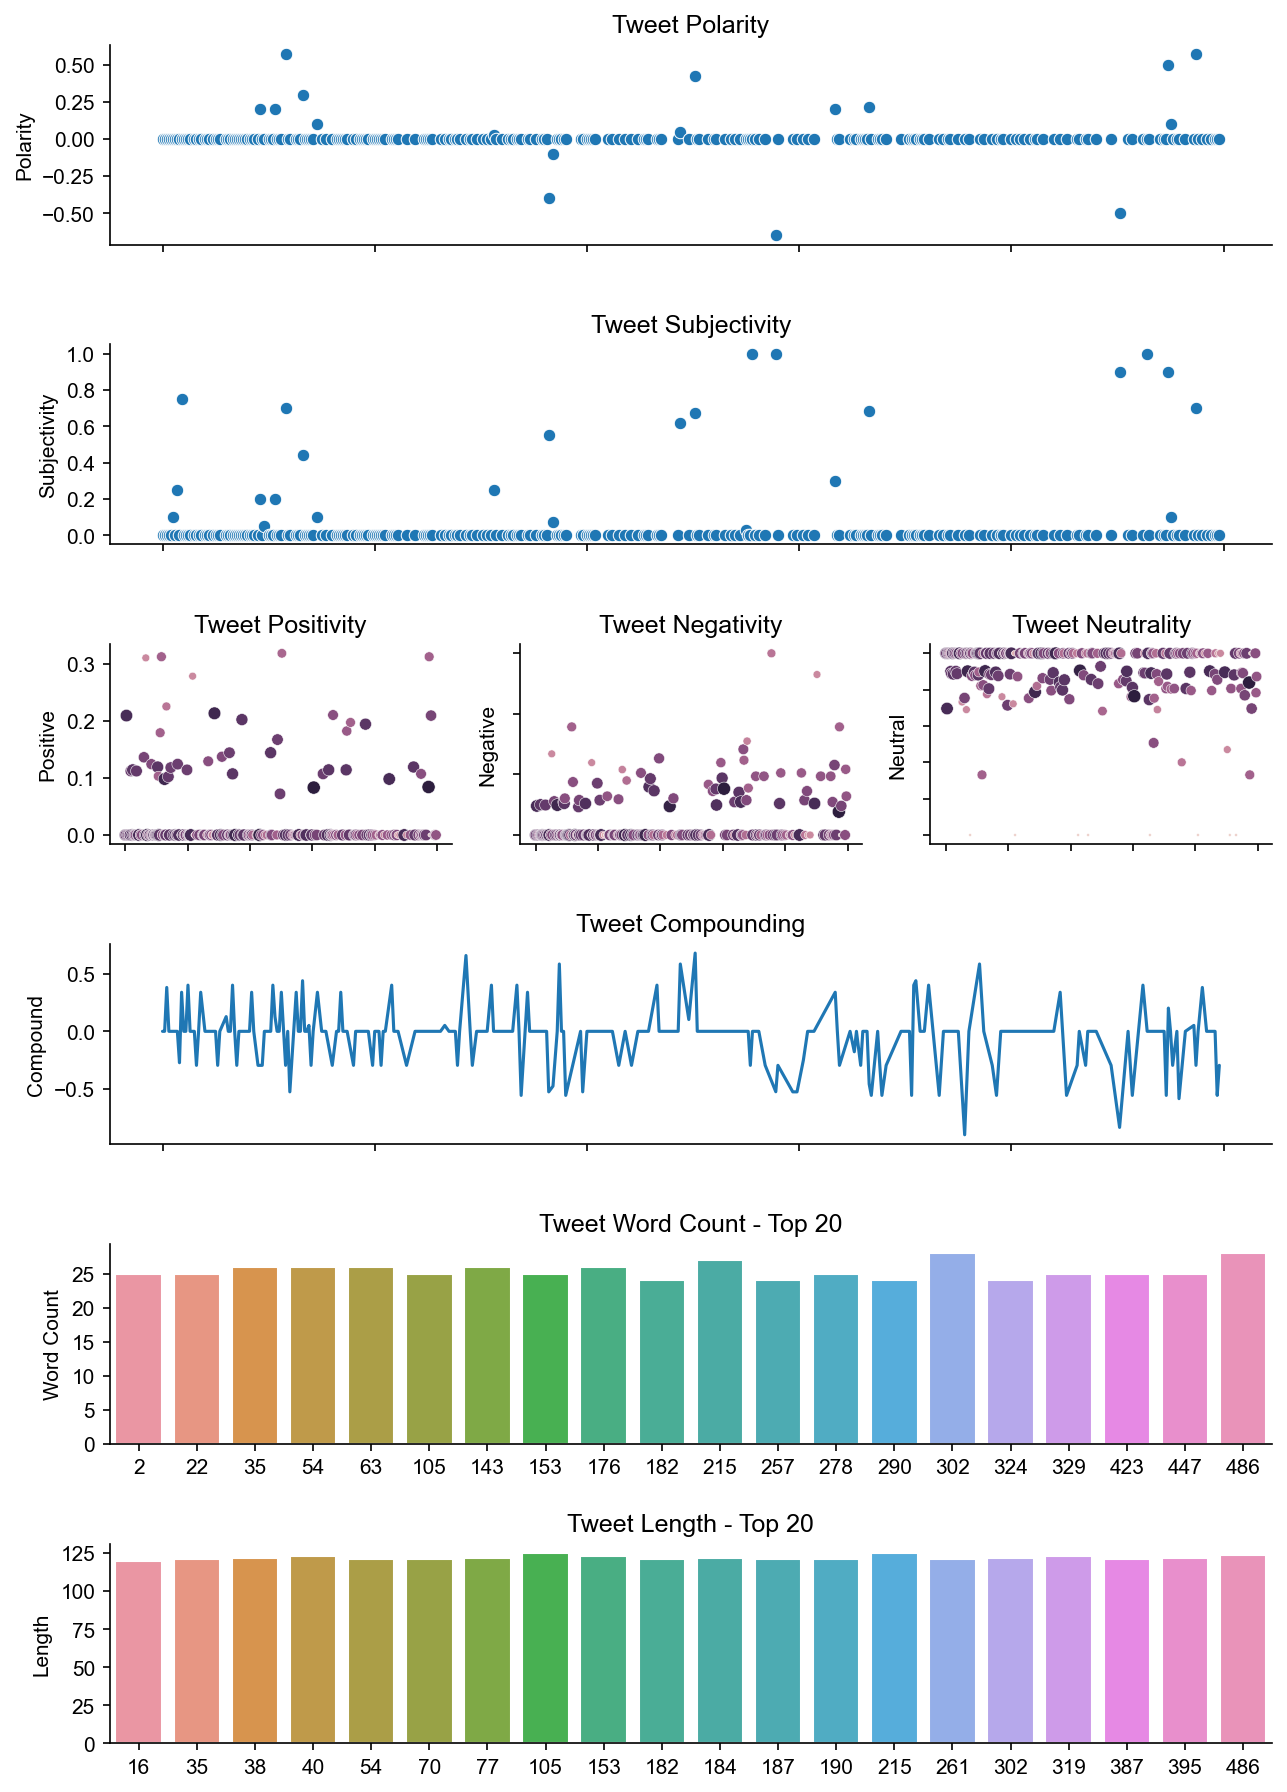

In [13]:
tweet_data_graph = tweet_data.reset_index()

fig = plt.figure(figsize=(10,15), dpi=150)
gs = fig.add_gridspec(6, 3)
gs.update(wspace=0.2, hspace=0.5)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[2, 1])
ax5 = fig.add_subplot(gs[2, 2])
ax6 = fig.add_subplot(gs[3, :])
ax7 = fig.add_subplot(gs[4, :])
ax8 = fig.add_subplot(gs[5, :])

colors = ["black", "lightgrey"]
colormap = mpl.colors.LinearSegmentedColormap.from_list("", colors)

sns.set_theme(style="white")
sns.despine(right=True, top=True)
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 7

ax1.set(title = "Tweet Polarity")
tweetpol = sns.scatterplot(data=tweet_data_graph, y="Polarity", x='index', ax=ax1)
tweetpol.set(xticklabels=[], xlabel = None)
ax2.set(title = "Tweet Subjectivity")
tweetsub = sns.scatterplot(data=tweet_data_graph, y="Subjectivity", x='index', ax=ax2)
tweetsub.set(xticklabels=[], xlabel = None)
ax3.set(title = "Tweet Positivity")
tweetpos = sns.scatterplot(data=tweet_data_graph, y="Positive", x='index', hue="Word Count", size="Word Count", sizes=(2, 40), legend=False, ax=ax3)
tweetpos.set(xticklabels=[], xlabel = None)
ax4.set(title = "Tweet Negativity")
tweetneg = sns.scatterplot(data=tweet_data_graph, y="Negative", x='index', hue="Word Count", size="Word Count", sizes=(2, 40), legend=False, ax=ax4)
tweetneg.set(xticklabels=[], yticklabels=[], xlabel = None)
ax5.set(title = "Tweet Neutrality")
tweetneu = sns.scatterplot(data=tweet_data_graph, y="Neutral", x='index', hue="Word Count", size="Word Count", sizes=(2, 40), legend=False, ax=ax5)
tweetneu.set(xticklabels=[], yticklabels=[], xlabel = None)
ax6.set(title = "Tweet Compounding")
tweetcom = sns.lineplot(data=tweet_data_graph, y="Compound", x='index', ax=ax6)
tweetcom.set(xticklabels=[], xlabel = None)
ax7.set(title = "Tweet Word Count - Top 20")
tweetwc = sns.barplot(data=tweet_data_graph.sort_values('Word Count', ascending=False).head(20), y="Word Count", x='index', ax=ax7)
tweetwc.set(xlabel = None)
ax8.set(title = "Tweet Length - Top 20")
tweetlen = sns.barplot(data=tweet_data_graph.sort_values('Length', ascending=False).head(20), y="Length", x='index', ax=ax8)
tweetlen.set(xlabel = None)

sns.set_theme(style="white")
sns.despine(right=True, top=True)
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 7

plt.show()

### Counting Unique Word Derivations 

In [14]:
countVectorizer = CV(analyzer = clean_text) 
countVector = countVectorizer.fit_transform(tweet_data['Raw Text'])

print('{} Number of Tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))

258 Number of Tweets has 1186 words


### Most Recurring Words

In [15]:
count_vect_data = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())

count = pd.DataFrame(count_vect_data.sum())
countdata = count.sort_values(0, ascending = False).reset_index().head(20)

fig = make_subplots(rows=1, cols=1, specs=[[{"type": "bar"}]])

fig.add_trace(go.Bar(x=countdata["index"], y=countdata[0], 
                     hovertemplate = "Tweet Distribution: <br>%{x} </br>Count: %{y} </br><extra></extra>",
                     marker_color='darkgreen'), 1, 1)

fig.update(layout_title_text='Tweet Distribution', layout_showlegend=False)
fig.update_layout(hoverlabel=dict(bgcolor="white", font_size=16, font_family="Rockwell"), hovermode='x', plot_bgcolor='white')
fig = go.Figure(fig)
fig.show()

### N - Gram

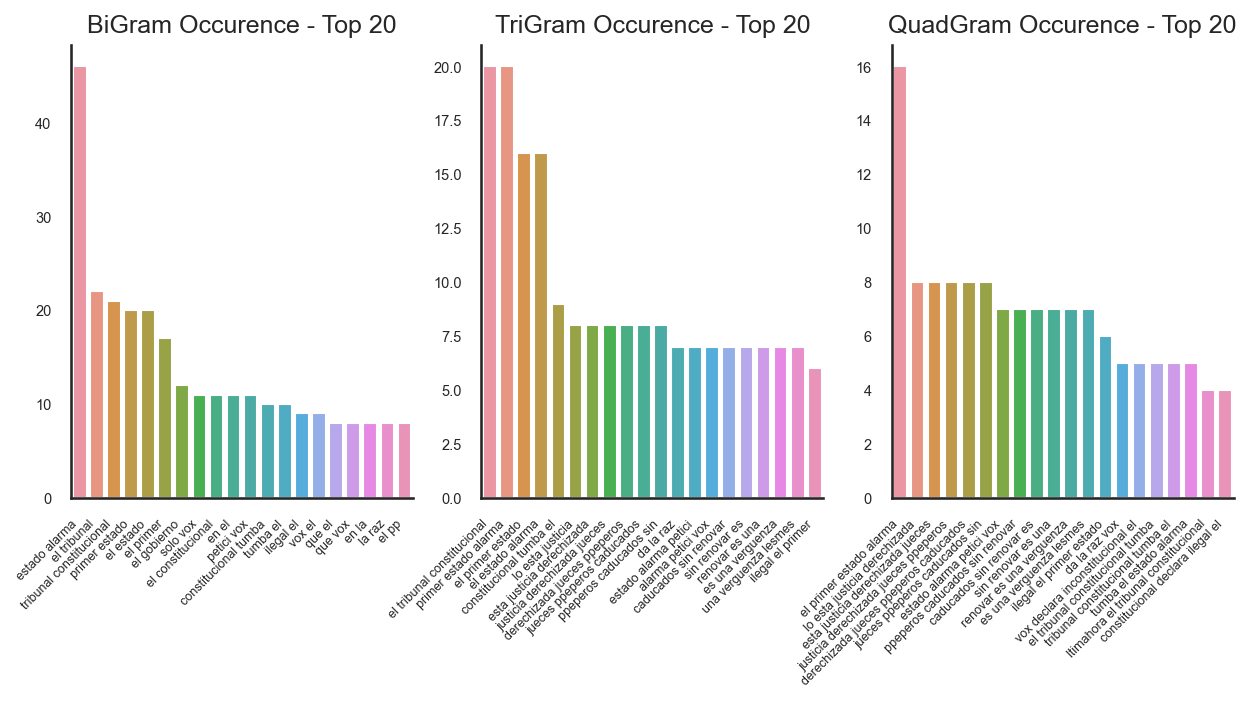

In [16]:
n2_bigrams = get_top_n_gram(tweet_data['Raw Text'], (2,2), 20)
n3_trigrams = get_top_n_gram(tweet_data['Raw Text'], (3,3), 20)
n4_quadgrams = get_top_n_gram(tweet_data['Raw Text'], (4,4), 20)

fig = plt.figure(figsize=(10,4), dpi=150)
gs = fig.add_gridspec(1, 3)
gs.update(wspace=0.2, hspace=0.5)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

sns.set_theme(style="white")
sns.despine(right=True, top=True)
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 7

ax1.set(title = "BiGram Occurence - Top 20")
tweetn2 = sns.barplot(y=[a[1] for a in n2_bigrams], x=[a[0] for a in n2_bigrams], ax=ax1)
tweetn2.set(xlabel = None)
tweetn2.set_xticklabels([a[0] for a in n2_bigrams], rotation = 45, ha="right")

ax2.set(title = "TriGram Occurence - Top 20")
tweetn3 = sns.barplot(y=[a[1] for a in n3_trigrams], x=[a[0] for a in n3_trigrams], ax=ax2)
tweetn3.set(xlabel = None)
tweetn3.set_xticklabels([a[0] for a in n3_trigrams], rotation = 45, ha="right")

ax3.set(title = "QuadGram Occurence - Top 20")
tweetn4 = sns.barplot(y=[a[1] for a in n4_quadgrams], x=[a[0] for a in n4_quadgrams], ax=ax3)
tweetn4.set(xlabel = None)
tweetn4.set_xticklabels([a[0] for a in n4_quadgrams], rotation = 45, ha="right")

sns.set_theme(style="white")
sns.despine(right=True, top=True)
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 7

plt.show()